# Importing libraries

In [2]:
#importing libraries 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [3]:
#ensure charts created don't need to be called 
%matplotlib inline

# Importing Data

In [4]:
#creating a path variable for orginal data
path = r'/Users/scarlettgrim/Python Projects/04-2024 Denver Airbnb Analysis'

In [5]:
#checking path variable output 
path

'/Users/scarlettgrim/Python Projects/04-2024 Denver Airbnb Analysis'

In [6]:
#using path variable to import denver_airbnb.csv
df_airbnb = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'listings_new_columns.csv'), index_col = False)

# Data Cleaning

In [7]:
df_airbnb.shape

(4816, 37)

In [8]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4816 entries, 0 to 4815
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   4816 non-null   int64  
 1   id                           4816 non-null   int64  
 2   host_id                      4816 non-null   int64  
 3   host_since                   4816 non-null   object 
 4   host_is_superhost            4816 non-null   bool   
 5   location                     4816 non-null   object 
 6   latitude                     4816 non-null   float64
 7   longitude                    4816 non-null   float64
 8   property_type                4816 non-null   object 
 9   room_type                    4816 non-null   object 
 10  guest_count                  4816 non-null   int64  
 11  bathrooms                    4816 non-null   float64
 12  beds                         4816 non-null   float64
 13  price             

In [9]:
df_airbnb.head(20)

,Unnamed: 0,id,host_id,host_since,host_is_superhost,location,latitude,longitude,property_type,room_type,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,entire_home_apt,Rating category,average_ratings
0,0,607435380788232654,430149575,2021-11-02,False,North Park Hill,39.760390,-104.929680,Private room in home,Private room,...,2.50,3.00,3.50,4.00,3.00,False,0.11,False,Low rating,3.083333
1,1,545714833502855511,169214047,2018-01-22,False,Hale,39.727850,-104.937830,Entire rental unit,Entire home/apt,...,0.00,0.00,0.00,0.00,0.00,False,0.00,True,No ratings,0.000000
2,2,52429527,107279139,2016-12-14,True,Five Points,39.758520,-104.988460,Entire townhouse,Entire home/apt,...,4.62,4.78,4.78,4.93,4.59,False,2.52,True,High rating,4.795000
3,3,632494576047532593,416194740,2021-07-31,True,West Colfax,39.736019,-105.050720,Entire townhouse,Entire home/apt,...,0.00,0.00,0.00,0.00,0.00,True,0.00,True,No ratings,0.000000
4,4,687768125161080215,133612752,2017-06-05,False,Sunnyside,39.771430,-105.020280,Entire home,Entire home/apt,...,5.00,5.00,5.00,4.92,4.92,False,0.99,True,High rating,4.986667
5,5,43316442,299373263,2019-10-01,False,Jefferson Park,39.748030,-105.022430,Entire townhouse,Entire home/apt,...,4.86,5.00,5.00,5.00,4.75,False,0.67,True,High rating,4.963333
6,6,53892390,436546995,2021-12-18,True,Chaffee Park,39.791370,-105.023540,Entire guesthouse,Entire home/apt,...,4.97,4.98,5.00,4.88,4.93,False,2.61,True,High rating,4.966667
7,7,842293747258462739,456393682,2022-04-27,True,Five Points,39.756066,-104.982419,Entire home,Entire home/apt,...,4.88,5.00,4.81,4.94,4.56,True,2.14,True,High rating,4.886667
8,8,717942620254550220,110328442,2017-01-07,False,Sunnyside,39.777902,-105.023757,Entire home,Entire home/apt,...,0.00,0.00,0.00,0.00,0.00,True,0.00,True,No ratings,0.000000
9,9,991710271661703752,263502162,2019-05-22,False,West Colfax,39.739604,-105.046350,Entire rental unit,Entire home/apt,...,0.00,0.00,0.00,0.00,0.00,True,0.00,True,No ratings,0.000000


In [10]:
#deleting the new index column I don't need 
df_airbnb.drop(columns = ['Unnamed: 0'], inplace = True)

In [11]:
df_airbnb.isnull().sum()

id                               0
host_id                          0
host_since                       0
host_is_superhost                0
location                         0
latitude                         0
longitude                        0
property_type                    0
room_type                        0
guest_count                      0
bathrooms                        0
beds                             0
price                           38
minimum_nights                   0
maximum_nights                   0
availability_30                  0
availability_60                  0
availability_90                  0
availability_365                 0
number_of_reviews                0
number_of_reviews_ltm            0
number_of_reviews_l30d           0
first_review                   709
last_review                    709
review_scores_rating             0
review_scores_accuracy           0
review_scores_cleanliness        0
review_scores_checkin            0
review_scores_commun

In [12]:
#dropping the 38 missing values in price 
df_airbnb.dropna(subset = ['price'], inplace = True)

In [13]:
#creating a subset with only the columns I want to conduct my visual analysis on

columns_to_keep = ['guest_count', 'bathrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights','availability_30', 'availability_60', 'availability_90', 'reviews_per_month', 'average_ratings']
df_bnb_selected = df_airbnb[columns_to_keep]

# Elbow technique

In [14]:
num_cl = range(1,10) # this defines the range of potential amount of clusters int he data 
kmeans = [KMeans(n_clusters=i) for i in num_cl] # this defines k-means clusters in the range its assigned

In [15]:
#creating a score that represents a rate of variation for each cluster option
score = [kmeans[i].fit(df_bnb_selected).score(df_bnb_selected) for i in range(len(kmeans))]
score

/Users/scarlettgrim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/Users/scarlettgrim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/scarlettgrim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/scarlettgrim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/scarlettgrim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

[-1011988223.3086936,
 -170692445.40638885,
 -96232208.86003987,
 -73343850.98460956,
 -60517582.009678505,
 -48658611.27538456,
 -42075257.73663734,
 -36128047.499456465,
 -32026866.31770114]

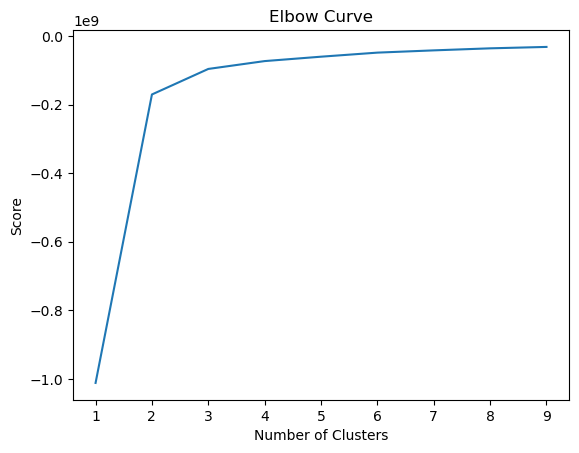

In [16]:
#plotting the elbow curve 
plt.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
plt.show()

# K means clustering 

In [17]:
#creating a KMeans object
kmeans = KMeans(n_clusters = 3)

In [18]:
#fitting the KMeans object to the data 
kmeans.fit(df_bnb_selected)

/Users/scarlettgrim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [19]:
df_bnb_selected['clusters'] = kmeans.fit_predict(df_bnb_selected)

/Users/scarlettgrim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/j7/qc9dwgls32lgx6gfjlypwy6m0000gn/T/ipykernel_73025/2420894596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bnb_selected['clusters'] = kmeans.fit_predict(df_bnb_selected)


In [20]:
df_bnb_selected.head()

,guest_count,bathrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,reviews_per_month,average_ratings,clusters
0,1,1.0,1.0,35.0,30,365,30,60,90,0.11,3.083333,0
1,6,2.0,3.0,149.0,30,365,29,59,89,0.00,0.000000,0
2,8,2.5,4.0,190.0,1,365,4,21,51,2.52,4.795000,0
3,5,2.5,2.0,87.0,29,365,0,0,0,0.00,0.000000,0
4,3,1.0,2.0,300.0,29,1125,0,0,27,0.99,4.986667,1


In [21]:
df_bnb_selected['clusters'].value_counts()

clusters
2    1780
0    1560
1    1438
Name: count, dtype: int64

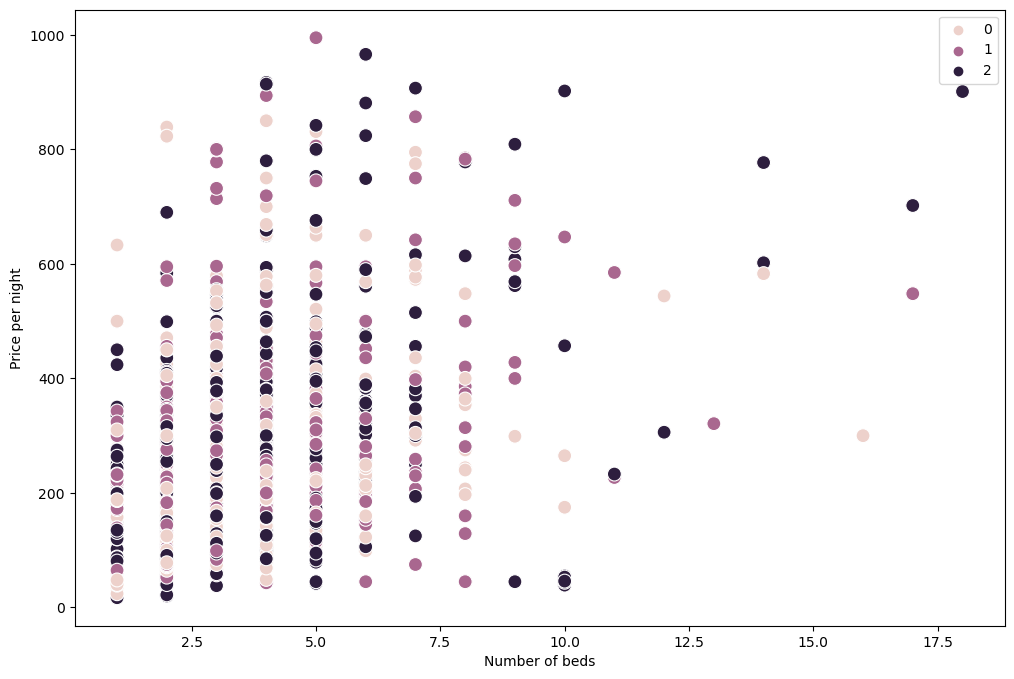

In [22]:
#plotting the clsuters for price and beds 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df_bnb_selected['beds'], y=df_bnb_selected['price'], hue=kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Number of beds')
plt.ylabel('Price per night')
plt.show()

# I still don't see much of a relationship between beds and price per night.  I think it may be safe to say that there is not a relationshiph between these two variables. 

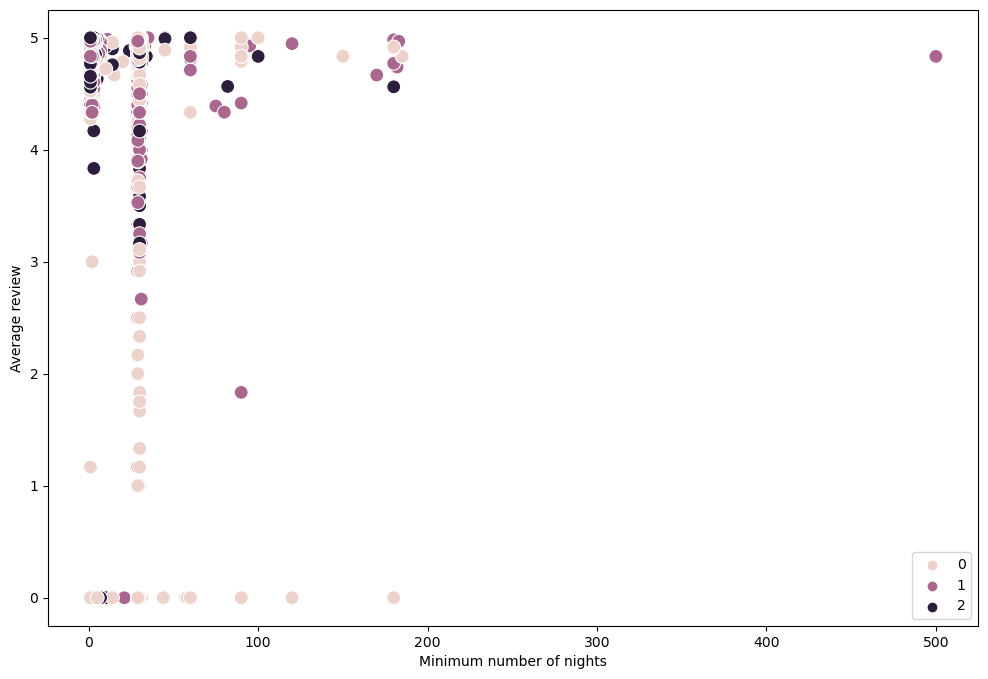

In [23]:
#plotting the clusters for minimum_nights and average_ratings
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df_bnb_selected['minimum_nights'], y=df_bnb_selected['average_ratings'], hue=kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Minimum number of nights')
plt.ylabel('Average review')
plt.show()

# Here I notice that most of the dark purple clusters fall around low minimum_nights and high average review. I wonder if this is because people have shorter trips and don't notice some of the things people may notice in a longer stay. The light pink seems to be largely grouped around the 30 night stay which is interesting. I wonder if these are the long term month to month airbnbs and that people are happier with them becuase they are kept up in a different manner than shorter stay airbnbs. 

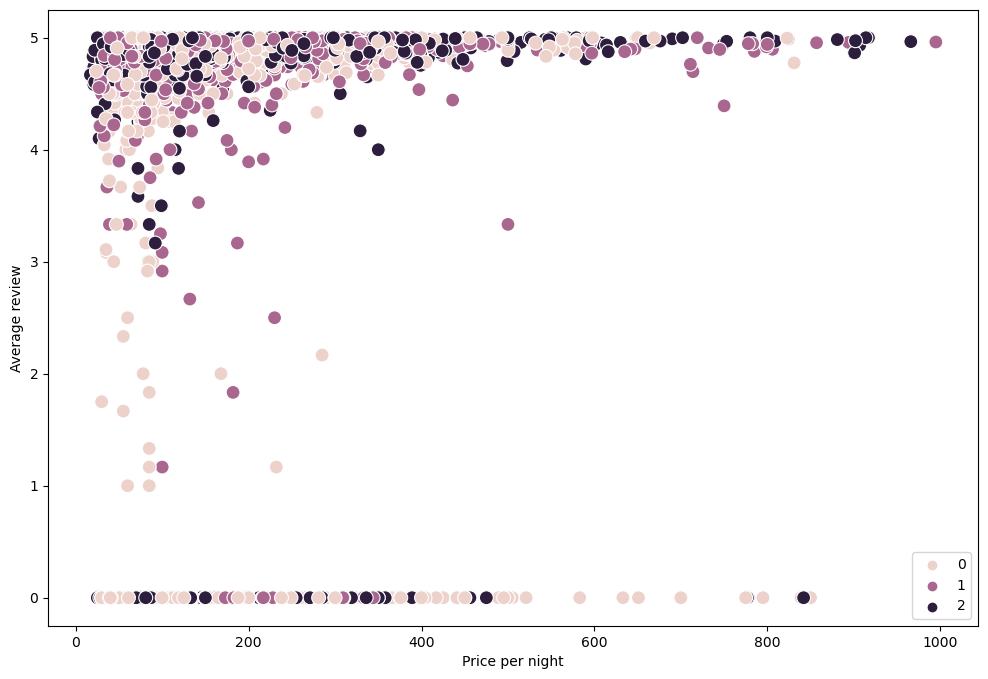

In [24]:
#plotting the clusters for price and average_ratings
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df_bnb_selected['price'], y=df_bnb_selected['average_ratings'], hue=kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('Price per night')
plt.ylabel('Average review')
plt.show()

In [25]:
df_bnb_selected.loc[df_bnb_selected['clusters'] == 2, 'cluster'] = 'dark purple'
df_bnb_selected.loc[df_bnb_selected['clusters'] == 1, 'cluster'] = 'purple'
df_bnb_selected.loc[df_bnb_selected['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/j7/qc9dwgls32lgx6gfjlypwy6m0000gn/T/ipykernel_73025/3095427166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bnb_selected.loc[df_bnb_selected['clusters'] == 2, 'cluster'] = 'dark purple'


In [26]:
df_bnb_selected.groupby('cluster').agg({'guest_count':['mean', 'median'],
                                        'bathrooms':['mean', 'median'],
                                        'beds':['mean', 'median'],
                                        'price':['mean', 'median'],
                                       'minimum_nights':['mean', 'median'],
                                       'maximum_nights':['mean', 'median'],
                                       'availability_60':['mean', 'median'],
                                       'availability_90':['mean', 'median'],
                                       'reviews_per_month':['mean', 'median'],
                                       'average_ratings':['mean', 'median']})

guest_count        bathrooms             beds              price  \
                   mean median      mean median      mean median        mean   
cluster                                                                        
dark purple    4.077528    4.0  1.473315    1.0  2.213483    2.0  155.817416   
pink           4.097436    4.0  1.537179    1.0  2.155128    2.0  151.475000   
purple         4.172462    4.0  1.483658    1.0  2.246175    2.0  157.257302   

                   minimum_nights        maximum_nights          \
            median           mean median           mean  median   
cluster                                                           
dark purple  119.0      10.941573    2.0      64.935955    31.0   
pink         120.0      19.831410   29.0     386.730128   365.0   
purple       120.0      17.732267   29.0    1123.668289  1125.0   

            availability_60        availability_90        reviews_per_month  \
                       mean median            mean median              mean   
cluster                                                                       
dark purple       34.222472   43.0       53.955056   67.0          2.241438   
pink              33.998077   42.0       54.814744   66.0          1.160353   
purple            32.464534   39.0       52.308067   64.0          1.809492   

                   average_ratings            
            median            mean    median  
cluster                                       
dark purple  1.715        4.356054  4.926667  
pink         0.390        3.581404  4.863333  
purple       1.000        4.517203  4.904167

# the pink is my highest reviews on avearge along with the highest price on average. This means that hte higher pice and the higher reviews are grouped together. I am curious about what locations these fall in given that they go hand in hand. Is this because more expensive airbnb's tend to be more luxurious? The pink color also holds the highest on average bedroom which leads me to wonder if this is also the larger airbnbs. I do think it is interesting that the purple column holds the highest on minimum nights and the dark purple holds the lowest on minimum nights. It seems there may be a large outlier on maximum_nights given that one of the averages is 1123.69. I may want to rerun this without that. The pink column also has the lowest average availaability_60 which I wonder if its becuase these are the highest rated airbnbs and they get booked first. Overall these statistics gave me great insight as to where to take my analysis next.  

In [27]:
#saving cluster dataset 
df_bnb_selected.to_csv(os.path.join(path, 'Data','Prepared Data', 'cluster_column.csv'))

In [28]:
#saving clsuter dataset in excel format for tableau
df_bnb_selected.to_excel(os.path.join(path, 'Data','Prepared Data', 'cluster_column.xlsx'))